In [1]:
library(tidyverse)
library(datateachr)
library(repr)
library(digest)
library(infer)
library(digest)
library(testthat)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches




In [2]:
data <- read_csv("https://raw.githubusercontent.com/UBC-LA-Hackathon/hack-la-2022/main/data/navigation_events.csv")

Rows: 62839 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (21): type, action, session_id, membership_role, membership_type, event...
dttm  (2): event_time, event__eventTime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
head(data)

type            action      event_time         
1 NavigationEvent navigatedto 2033-03-27 03:08:48
2 NavigationEvent navigatedto 2033-03-30 16:23:40
3 NavigationEvent navigatedto 2033-03-25 12:57:06
4 NavigationEvent navigatedto 2033-03-20 15:57:10
5 NavigationEvent navigatedto 2033-01-11 18:05:29
6 NavigationEvent navigatedto 2033-01-11 17:54:12
  session_id                       membership_role membership_type
1 f8eac5633f79de90a77b33338b14dd8e ["Learner"]     Membership     
2 90d33cac1281c636931efa7646e1e1c3 ["Learner"]     Membership     
3 2c3cdb1505e1c2dbf93d70b499668328 ["Learner"]     Membership     
4 bd87f5bcffda3d2f6de47cf02697f43b ["Learner"]     Membership     
5 d5c5f36d8bc0ebc001c374f9daec961b ["Learner"]     Membership     
6 d5c5f36d8bc0ebc001c374f9daec961b ["Learner"]     Membership     
  event__id                        event__type     event__actor_type
1 a3bd94baaa440f4793ad08bb64ed3a8f NavigationEvent Person           
2 0f137ee4ff1b603e3c9de17c5dc9a1d2 NavigationEvent Person           
3 86109c5350e06d3d7fe0ec880f37193e NavigationEvent Person           
4 da5b96f601b39f14e2cc7de59bea35b9 NavigationEvent Person           
5 7959480d52ab4c94821c122e27a48cd3 NavigationEvent Person           
6 5af6e58a6fccd299a8b0e016d4ca7784 NavigationEvent Person           
  event__action ⋯ event__object_extensions_http_method event__eventTime   
1 NavigatedTo   ⋯ GET                                  2033-03-27 03:08:48
2 NavigatedTo   ⋯ GET                                  2033-03-30 16:23:40
3 NavigatedTo   ⋯ GET                                  2033-03-25 12:57:06
4 NavigatedTo   ⋯ GET                                  2033-03-20 15:57:10
5 NavigatedTo   ⋯ GET                                  2033-01-11 18:05:29
6 NavigatedTo   ⋯ GET                                  2033-01-11 17:54:12
  event__edApp_type   event__session_type object_id_type event__object_id_type
1 SoftwareApplication Session             attachment     attachment           
2 SoftwareApplication Session             attachment     attachment           
3 SoftwareApplication Session             attachment     attachment           
4 SoftwareApplication Session             attachment     attachment           
5 SoftwareApplication Session             attachment     attachment           
6 SoftwareApplication Session             attachment     attachment           
  event__attachment_type object_id                       
1 pdf                    0878d2f171deae54c6a81acc6ffeba20
2 pdf                    0878d2f171deae54c6a81acc6ffeba20
3 png                    aa6bffb0a91e4f737a943dfddad70a7b
4 png                    aa6bffb0a91e4f737a943dfddad70a7b
5 png                    aa6bffb0a91e4f737a943dfddad70a7b
6 png                    aa6bffb0a91e4f737a943dfddad70a7b
  event__object_extensions_asset_name actor_id 
1 file003.pdf                         LEARNER_1
2 file003.pdf                         LEARNER_1
3 image006.png                        LEARNER_1
4 image006.png                        LEARNER_1
5 image006.png                        LEARNER_1
6 image006.png                        LEARNER_1

In [4]:
summary(data)

     type              action            event_time                 
 Length:62839       Length:62839       Min.   :2033-01-02 16:47:19  
 Class :character   Class :character   1st Qu.:2033-01-28 20:00:03  
 Mode  :character   Mode  :character   Median :2033-02-23 10:57:24  
                                       Mean   :2033-02-23 18:30:48  
                                       3rd Qu.:2033-03-21 01:10:13  
                                       Max.   :2033-06-15 19:38:36  
  session_id        membership_role    membership_type     event__id        
 Length:62839       Length:62839       Length:62839       Length:62839      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                       

In [5]:
unique(data$action) 

[1] "navigatedto"

In [6]:
unique(data$object_id) 

[1] "0878d2f171deae54c6a81acc6ffeba20" "aa6bffb0a91e4f737a943dfddad70a7b"
  [3] "bb62cd396b9a8a94ecef6b5d1c4f8ad1" "071ad0d80cbc232cf74b72681bc77abf"
  [5] "a4dc11e7e79361fc5886a9078aac66b8" "c26d026ab9a7c2b418fc159053a9a4ba"
  [7] "7b8bc1746dfd1313de6b03ab0bd1061a" "5a764dcd07eec789dd33d1656b64c074"
  [9] "4ebde2ecce47a0f01ade2ad63bb22eec" "8fcda9674680cd5edb773f3a362cc7a6"
 [11] "fa74bf473e9a758f51f5bd0259d4ff5a" "2cb69a45828f6ad46c1975d35822ce4d"
 [13] "c916612763c04832d8e7b9e89deb7d2a" "9db3a0a2856a309087be7a7b0a9efc31"
 [15] "25750f55fd98a27d4a710edd4903986b" "bb971b36c1578cede00150acda89aa99"
 [17] "0790ff605875f7393f9fde5c50c3eae4" "b0ed6ea496686db942cfc5f59c6dc28e"
 [19] "b95848c2938c71bf7615121395edcde6" "449cbcaffb247e04fa8151f487926aab"
 [21] "7c021239a168ebf0a2983f1109bf8252" "1b4199b940079ccb8dc5f404b9324e43"
 [23] "7d68df039b8c7c649c9fa1780182e3eb" "948d61de4855316ddbd9c9ac4eb635c0"
 [25] "74d57e9d2bfa697878ac88bca9170c78" "811d93ea379b5cdd5a19f1b5dbab88cd"
 [27] "4cbd0430b37cb104735fd90fcda5105b" "b1584d4a4f85fdefffcc0bbe92496d8d"
 [29] "3b056daae90e19d3158163def926452d" "df8d1f1ff3f48fdc24a278b40c5f45cc"
 [31] "4a5f8d361306c7c9c0ea2c6edd2058f8" "080b527f7d79996e80fed0022f7e7cf6"
 [33] "a82dbc0d103f6504ab0f2813d9074ad1" "2b51194cc04176e46fa9920ea72ce989"
 [35] "fa1eff77ade467e23a24e472f1a92a1b" "a8d0e68649a4f0de4c5f38a41427d486"
 [37] "0e377154922b37ebb574b3ebd79f3cb7" "ded4a72e7c13e4c90e81f1dd5a6b39f7"
 [39] "653249c64914f26409cda84315e0e49e" "45a80de6e0891f1807f75304120b88c6"
 [41] "316041836346f43f793943de3784431a" "f9f4d1c3b82b7eba9b7b8fe66d8a1e63"
 [43] "62c20a694734f5a7cd666e79f5051448" "7c9e39571ad00fe24282e5b5366d7563"
 [45] "392f9b557bc8cefe814b282f3c950fec" "a5e55cb3682f7e9ffd7e66de1013d029"
 [47] "f7637e9b1dc8c7aeb471358c752a5508" "3bc2d8a4ae8dfa21b926bc34599560e2"
 [49] "18fe2646650a110e67522a4237733f55" "9ef7d7e62a0117e6fca291f4ce0a00c2"
 [51] "9750b8c484a72b267a1c199395afcf9c" "e9a85e5b898965fd6233845940117c52"
 [53] "3ddf7eb84af5891d3485da47d150e22f" "486f64fc1534c9aab93ca8330b4aeb09"
 [55] "43c43b0b7b88277787923dbc6e339078" "280c00d0e159303ccca4c584deaa5264"
 [57] "a34ef53158a2362f67dd8a57cc70150a" "ae6e746c589aa292fe9d9f5377f7cd58"
 [59] "972196dd128aeb62a66f5c02b897e7dd" "8b4a51ccd50cfdddaaeef8f5b271f0f5"
 [61] "73243377f95d65ba892c4e18f619ef87" "82a26ee3f3c2c7e9882a071af88176e7"
 [63] "6e273aa35d08f484566f34a1d6d5bedc" "5b57dca24bca6095bf7103af35c263e6"
 [65] "a842db98cf9848c702865cdb8661ac00" "ec7e3f0c194d0133686572e93f1e5089"
 [67] "760d27de1a84d2c2d689e01d9a49e5c0" "df524b51c50a872a1e4edf9ee376a883"
 [69] "d0830b45b5e5d05589a59d363d04ee0c" "c1ca8b84758d7f8d59724eec336bd5be"
 [71] "026a8682967aa34e43d682a51f743de0" "92ff63ab3f5976740d2c7473c720aaf3"
 [73] "5f2f6ff53a32ac52dd6b215c72eb6ccf" "8e664ae1f08064a3efa2b68b5097b9b4"
 [75] "9a7b36affcc8d45e2b77bc274d7059e5" "c09867b84a27236f565d618a7252a4fd"
 [77] "52b340df332661bf4d6b56a24aa1090a" "69d0f858b0403b03ce4d3775f3ad34de"
 [79] "9bd13fbb992401350f0e3ab2992d1edb" "c4358c46f3a8b740b268fb88454da1b7"
 [81] "eee9957a18707b6e84f76dd22ebb2aff" "c719c68d3f3a97aba7ba82141796a79b"
 [83] "c5bca09eacc539286029526416140d95" "132f3fab56d60839d727b966a76c1b1e"
 [85] "71f7bb7fa280f63010449c882c04ad42" "0083641e2e8cf92a45d209350b12f797"
 [87] "d7eb139c1e154130f23d54bb0065753e" "6ff09aba3e7ff346f2075f8311e7636e"
 [89] "37b09086c44ef89b3c8e1336cc10fe62" "8ce33c40a1eee2e96430e2cb5f458e18"
 [91] "3fd8425703c68a9eef954d401b0f7198" "0a31f2efd159230560dab31d27756fb1"
 [93] "c81f04547a95da2a7b88054ef491b7c4" "9dee3745ead93ae95cab79eaa17b6732"
 [95] "9383eebd9a062f53a1b884a94b27c558" "77db8e17563955af14dd1bea5d82a703"
 [97] "e1f90c16c123e0f96b2af7d94a1c335c" "b22a9119e77a2dae0aeed4f0792cdc8a"
 [99] "5140d6a41e913754246127780ae01505" "38da9c46ca05b04b0b0335af760c3bdd"
[101] "e8210024c6225f2fb46f2fafc5683e42" "4ddd0c7b98c54bd1745ee38778c6ec5b"
[103] "e62fb1cf14d22a436cc48019d4d237a1" "a2bba53e41eab08823a8e2ba2a6955ef"
[105] "26b56f0824ee817de6df74441ba9e420" "deeda0d4

In [7]:
unique(data$event__id) 

[1] "a3bd94baaa440f4793ad08bb64ed3a8f" "0f137ee4ff1b603e3c9de17c5dc9a1d2"
    [3] "86109c5350e06d3d7fe0ec880f37193e" "da5b96f601b39f14e2cc7de59bea35b9"
    [5] "7959480d52ab4c94821c122e27a48cd3" "5af6e58a6fccd299a8b0e016d4ca7784"
    [7] "5cc8091619a4990e31ba3e25b30da250" "91f98fe91f12b70ca45800af7c3f5886"
    [9] "5d905b3f56c4c70910f515b6fe45f111" "82d08538b33078653dee9b3b12911dc0"
   [11] "f95d4bf3727d60b7656d6eeefcf8832c" "d292d50f6f1da92a85b89b1edfc974b2"
   [13] "bc678b34336f00c2c78ca6d581688526" "5abf914ecfa3462b6b7235d149a824ff"
   [15] "56d5bfd9a70d1f8c345bd09352edd1fa" "c27a7f166486c57f2fd60e839c6eedda"
   [17] "d6b69f1bfc64e05b3467242688bb16a8" "a3e8d5818e2550af5e4a6a5f13fb5774"
   [19] "fb14330d789dd6d6c55e1d65a960c725" "17862f436d6ca72d1ea8ec1d8060465f"
   [21] "fb56cb70609d5e5d7047ef4a26f68f98" "34f6d15046e5ddb5523ad083eb8d7f01"
   [23] "cfde5f26f4866db708c28286b17fc8fb" "542e5e0c6283c1a39bb251287c9d5470"
   [25] "cf96520497d2957ab9a8cb19bffc878e" "66b47dc7655e6113c245faafdc8aeb35"
   [27] "49198b1a4761d0cdf53215ed144a02cf" "4760c580be7dbe1cd5471640de5bf581"
   [29] "68f6ba4e04e6088d4073449455cdd171" "7adb684b2977188d4110463a6bbd5259"
   [31] "ba8464d07ca95831bd01566d0998e5c9" "9ca9195590940db6c7fc4e011aae81f7"
   [33] "3c03167e814973c2a17473fd385d5cdb" "5f99537f201fb2dfcce31f820ac82d9b"
   [35] "f8a9cb1fb5c03ad604d0a83a7908cccc" "1fb5aa5c1a469b87302b80953a83506a"
   [37] "56f279ed828e8502fb21991812fb0fd8" "131add0547cee08712323b3cf8617a32"
   [39] "769f64ad06fda0e91b3a9a0681a392b0" "fbb701814ae51e3ff8b9cfee6dcd3429"
   [41] "5c208a4a6a9071194f142e9cc20b40e1" "915faecdc05f75ba03e29faf6886b026"
   [43] "fa1bf9ab123085b930e2d40d602bc2cb" "4044e3128f56dbeefbe4fe2b25fec8d5"
   [45] "ae35add4fbe9d97f4fe5b1e70a4989b0" "b36e5462c320b367e2499c0ae9cf80b8"
   [47] "a923a4b72e4d4c40864882a2671f884e" "91b864f2f6a5f4bbc2ae324b5577b345"
   [49] "d215aa4d3bc868e535e68c56c16897ef" "b66e3d14c11fa419a28d5b6e5e90ff4c"
   [51] "31a95ff4c8406791fba3495e68d3f93e" "cc9c0184e0baa9d0e9cb78d5ff27bbc1"
   [53] "f8b68eaccf26cf1a048b225a254be42c" "8495559c4dc3681e87a98866f75dba5e"
   [55] "1ee9519432b14eb2f0d9b30916a555d0" "1f96d850499610fc1e643f64eb2563b8"
   [57] "e69935faa911cc28529ee487e1527f90" "32bd7d6ede9e948742f85fea83f5797e"
   [59] "4afb7c7ea10203b8a9456a94f5ba9b7c" "b008b3ddce09801932902880b4ec28f7"
   [61] "2c363fa20144de8fe1f7f80816eb8562" "c6aa0dced17fb88a5ba39be0933fd209"
   [63] "16c051f7b7e73badd13b49b328d36664" "5daff7af90c1c9556a95a1e22ff34039"
   [65] "90fd8f00818347b48c14fe1be49c454a" "24bc9c9a796bb08eeeec5c35ffa18b57"
   [67] "5cd08178cdb88d92f7332afca5934717" "851023c204fdc252d556cbfd488576a1"
   [69] "23779170b0eb849f00116c9e1e43e461" "e3def977c6c5c137aef9664c69797c53"
   [71] "5cd3a0737f845196830c61cb716fee9b" "b864d77a215582fd98ea641a52eff1ab"
   [73] "e0cbf60764d87e333a8fc26a7884a440" "99a5f6145f1ba269f55a7db870123522"
   [75] "8e93c0fd5564e5e6d156e5e045fa8ad6" "68569097cc76350b2b91dee34bc96f47"
   [77] "dec56891bb512afc3dbadcb7d9407482" "865d15d24b4e87053ee20adc50530b34"
   [79] "0bcecb558273ac15bb9b33c1e4904f48" "25939ec8a6a235457c43f6d940b1dcf3"
   [81] "39e75c08995cf1b62b898257d872323c" "b9138c88da5cf282b7f54e378d43d93e"
   [83] "12612a2b4dba5b0dbad7ed5887eb9d2a" "b79dd9a7fca25ea2ce2f250faf02031e"
   [85] "1e1c993d2dbf684177af52cff151fc6a" "abf0146f1f0c2564d892aacd1cb3cbed"
   [87] "eee9f7a137362a47bf9577b7b69869c7" "019e7976ab3165b7a1bdfc143a1fae80"
   [89] "d1ec213180e2a8ca82f06ef8444581c7" "9ff9abe9be626cb459713e012ed75e79"
   [91] "1508b7968d93417f05ff0926c9e6efa2" "bcf847af126134090cf1e20b0cc75ff1"
   [93] "07f80a6f0dc6254f0a143b1e04a67964" "7621cf8b44670ecce233289c629fae00"
   [95] "49e299c1a7395cd5a82cd2dab731e5ec" "362dabebaa3038030fc23fb484fa67c2"
   [97] "cbd7a105b2782a5689ccea58e6f02b63" "e7e96d00337cb55334ac52969dcec9fa"
   [99] "68606fccea7a49151c1a9174b7e68f60" "a3ce9e0007e32cc8e2a707fefa182bfa"
  [101] "3961d5e3eabff19372bb49d000f6a8f0" "8f67992628d1cb0c7339b25960bf4c41"
  [103] "cd1156cd80937b788

In [8]:
unique(data$type) 

[1] "NavigationEvent"

In [9]:
unique(data$membership_role) 

[1] "[\"Learner\"]"    "[\"Instructor\"]" "Null"

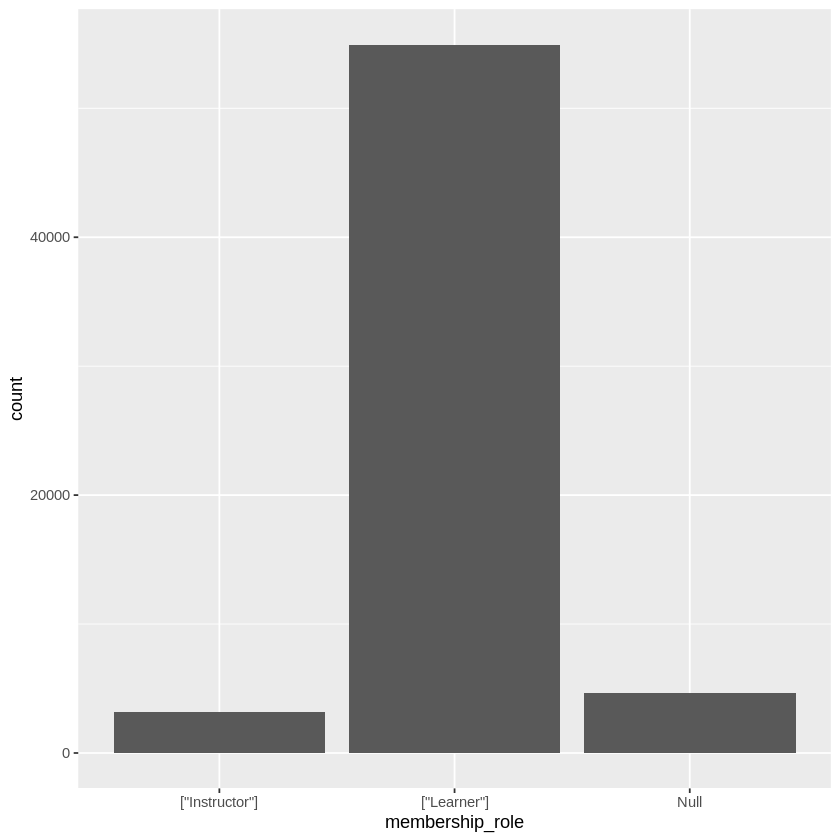

In [10]:
membership_role_plot <- data %>%
ggplot()+geom_bar(aes( x = membership_role))
membership_role_plot

In [11]:
event_action_d <- data %>%
select(event__action)

In [12]:
head(event_action_d)

event__action
1 NavigatedTo  
2 NavigatedTo  
3 NavigatedTo  
4 NavigatedTo  
5 NavigatedTo  
6 NavigatedTo

In [13]:
time_d <- data %>%
select(event_time)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



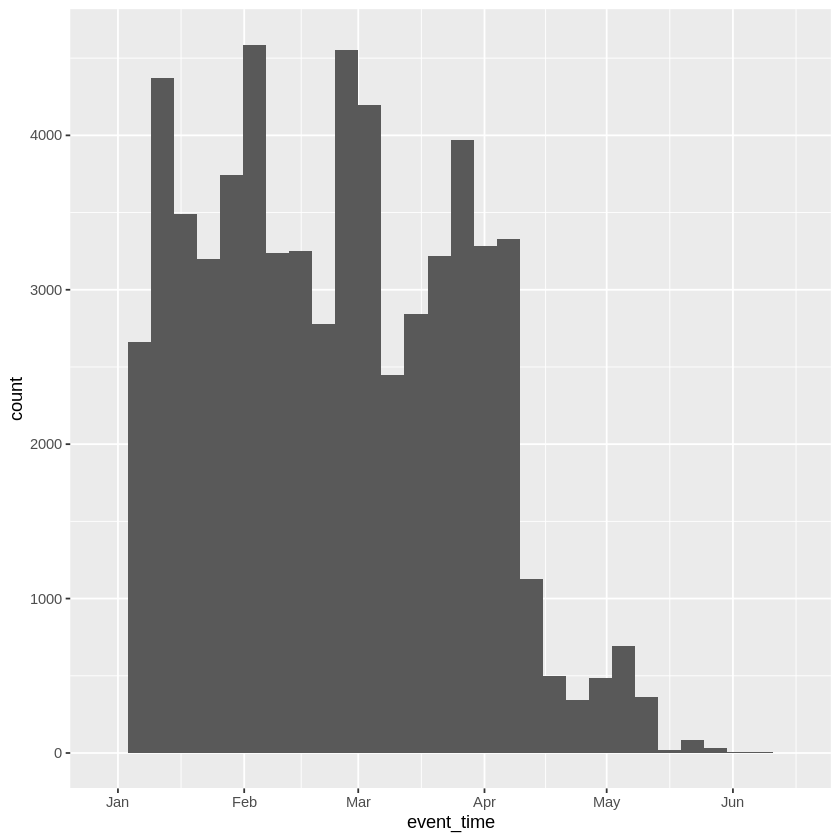

In [14]:
time_plot <- data %>%
ggplot()+geom_histogram(aes(x = event_time))
time_plot

In [15]:
grades <- read_csv("https://raw.githubusercontent.com/UBC-LA-Hackathon/hack-la-2022/main/data/additional/gradebook.csv")

Rows: 36 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (13): Student, Assignment 1 (c81f04547a95da2a7b88054ef491b7c4), Assignme...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [16]:
names(grades)<-str_replace_all(names(grades), c(" " = "." , "," = "", "-" = "_"))

In [17]:
grades <- slice(grades,-1,-2)

In [18]:
cur_grade <- grades %>%
select(Current.Score)

In [19]:
head(grades)

Student    Assignment.1.(c81f04547a95da2a7b88054ef491b7c4)
1 LEARNER_4  88                                             
2 LEARNER_10 88                                             
3 LEARNER_34 90                                             
4 LEARNER_16 88                                             
5 LEARNER_7  92                                             
6 LEARNER_30 77                                             
  Assignment.2.(a4dc11e7e79361fc5886a9078aac66b8)
1 76                                             
2 72                                             
3 78                                             
4 71                                             
5 83                                             
6 89                                             
  Assignment.3.(option.A).(811d93ea379b5cdd5a19f1b5dbab88cd)
1 75                                                        
2 74                                                        
3 73                                                        
4 NA                                                        
5 NA                                                        
6 NA                                                        
  Assignment.3.(option.B).(df8d1f1ff3f48fdc24a278b40c5f45cc)
1 NA                                                        
2 NA                                                        
3 NA                                                        
4 NA                                                        
5 NA                                                        
6 NA                                                        
  Assignment.3.(option.C).(bb971b36c1578cede00150acda89aa99)
1 NA                                                        
2 NA                                                        
3 NA                                                        
4 77                                                        
5 80                                                        
6 74                                                        
  Assignment.3.(option.D).(f1ad954cd2cddda6e17f6fc225d1aa3e)
1 NA                                                        
2 NA                                                        
3 NA                                                        
4 NA                                                        
5 NA                                                        
6 NA                                                        
  Participation.grade:.Formative.(not.included.in.final.grade).(5965e0b0c712861d0efdd9be54572114)
1 10                                                                                             
2 8.5                                                                                            
3 9                                                                                              
4 10                                                                                             
5 10                                                                                             
6 7                                                                                              
  Assignment.1.Current.Score Assignment.2.Current.Score
1 88                         76                        
2 88                         72                        
3 90                         78                        
4 88                         71                        
5 92                         83                        
6 77                         89                        
  Assignment.3.Current.Score Participation.&.engagement.Current.Score
1 75                         100                                     
2 74                         85                                      
3 73                         90                                      
4 77                         100                                     
5 80                         100                                     
6 74               

In [20]:
head(cur_grade)

Current.Score
1 82.9         
2 78.4         
3 81.3         
4 82           
5 87.3         
6 78.3

In [21]:
enrol_data <- read_csv("https://raw.githubusercontent.com/UBC-LA-Hackathon/hack-la-2022/main/data/additional/enrollments.csv")

Rows: 35 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): user_id, type
dbl  (1): total_activity_time
lgl  (1): last_attended_at
dttm (1): last_activity_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [22]:
head(enrol_data)

user_id    type              last_activity_at    last_attended_at
1 LEARNER_10 StudentEnrollment 2033-04-27 05:55:39 NA              
2 LEARNER_7  StudentEnrollment 2033-04-27 06:25:33 NA              
3 LEARNER_8  StudentEnrollment 2033-04-28 04:21:40 NA              
4 LEARNER_20 StudentEnrollment 2033-05-18 01:43:47 NA              
5 LEARNER_13 StudentEnrollment 2033-06-05 14:42:45 NA              
6 LEARNER_37 StudentEnrollment 2033-05-05 13:00:26 NA              
  total_activity_time
1  421763            
2 2025102            
3 1036998            
4  201541            
5  774430            
6  862185

In [23]:
names(enrol_data)[names(enrol_data) == 'user_id'] <- 'Student'

In [24]:
head(enrol_data)

Student    type              last_activity_at    last_attended_at
1 LEARNER_10 StudentEnrollment 2033-04-27 05:55:39 NA              
2 LEARNER_7  StudentEnrollment 2033-04-27 06:25:33 NA              
3 LEARNER_8  StudentEnrollment 2033-04-28 04:21:40 NA              
4 LEARNER_20 StudentEnrollment 2033-05-18 01:43:47 NA              
5 LEARNER_13 StudentEnrollment 2033-06-05 14:42:45 NA              
6 LEARNER_37 StudentEnrollment 2033-05-05 13:00:26 NA              
  total_activity_time
1  421763            
2 2025102            
3 1036998            
4  201541            
5  774430            
6  862185

In [25]:
jointdataset <- merge(enrol_data, grades, by = "Student")

In [26]:
head(jointdataset)

Student    type              last_activity_at    last_attended_at
1 LEARNER_1  StudentEnrollment 2033-05-26 03:10:40 NA              
2 LEARNER_10 StudentEnrollment 2033-04-27 05:55:39 NA              
3 LEARNER_11 StudentEnrollment 2033-05-15 00:38:06 NA              
4 LEARNER_12 StudentEnrollment 2033-05-25 18:43:44 NA              
5 LEARNER_13 StudentEnrollment 2033-06-05 14:42:45 NA              
6 LEARNER_14 StudentEnrollment 2033-04-27 14:18:30 NA              
  total_activity_time Assignment.1.(c81f04547a95da2a7b88054ef491b7c4)
1 985351              79                                             
2 421763              88                                             
3 285214              90                                             
4 176035              86                                             
5 774430              88                                             
6 155823              95                                             
  Assignment.2.(a4dc11e7e79361fc5886a9078aac66b8)
1 84                                             
2 72                                             
3 79                                             
4 87                                             
5 86                                             
6 92                                             
  Assignment.3.(option.A).(811d93ea379b5cdd5a19f1b5dbab88cd)
1 NA                                                        
2 74                                                        
3 NA                                                        
4 NA                                                        
5 87                                                        
6 NA                                                        
  Assignment.3.(option.B).(df8d1f1ff3f48fdc24a278b40c5f45cc)
1 NA                                                        
2 NA                                                        
3 NA                                                        
4 NA                                                        
5 NA                                                        
6 86                                                        
  Assignment.3.(option.C).(bb971b36c1578cede00150acda89aa99)
1 73                                                        
2 NA                                                        
3 82                                                        
4 73                                                        
5 NA                                                        
6 NA                                                        
  Assignment.3.(option.D).(f1ad954cd2cddda6e17f6fc225d1aa3e)
1 NA                                                        
2 NA                                                        
3 NA                                                        
4 NA                                                        
5 NA                                                        
6 NA                                                        
  Participation.grade:.Formative.(not.included.in.final.grade).(5965e0b0c712861d0efdd9be54572114)
1 9                                                                                              
2 8.5                                                                                            
3 9                                                                                              
4 8                                                                                              
5 8                                                                                              
6 6                                                                                              
  Assignment.1.Current.Score Assignment.2.Current.Score
1 79                         84                        
2 88                         72                        
3 90                         79                        
4 86                         87                        
5 88        

In [27]:
jointdataset <- jointdataset %>%
mutate(Assignment.1.Current.Score = as.numeric(Assignment.1.Current.Score),
       Assignment.2.Current.Score = as.numeric(Assignment.2.Current.Score),
       Assignment.3.Current.Score = as.numeric(Assignment.3.Current.Score))

In [28]:
head(jointdataset)

Student    type              last_activity_at    last_attended_at
1 LEARNER_1  StudentEnrollment 2033-05-26 03:10:40 NA              
2 LEARNER_10 StudentEnrollment 2033-04-27 05:55:39 NA              
3 LEARNER_11 StudentEnrollment 2033-05-15 00:38:06 NA              
4 LEARNER_12 StudentEnrollment 2033-05-25 18:43:44 NA              
5 LEARNER_13 StudentEnrollment 2033-06-05 14:42:45 NA              
6 LEARNER_14 StudentEnrollment 2033-04-27 14:18:30 NA              
  total_activity_time Assignment.1.(c81f04547a95da2a7b88054ef491b7c4)
1 985351              79                                             
2 421763              88                                             
3 285214              90                                             
4 176035              86                                             
5 774430              88                                             
6 155823              95                                             
  Assignment.2.(a4dc11e7e79361fc5886a9078aac66b8)
1 84                                             
2 72                                             
3 79                                             
4 87                                             
5 86                                             
6 92                                             
  Assignment.3.(option.A).(811d93ea379b5cdd5a19f1b5dbab88cd)
1 NA                                                        
2 74                                                        
3 NA                                                        
4 NA                                                        
5 87                                                        
6 NA                                                        
  Assignment.3.(option.B).(df8d1f1ff3f48fdc24a278b40c5f45cc)
1 NA                                                        
2 NA                                                        
3 NA                                                        
4 NA                                                        
5 NA                                                        
6 86                                                        
  Assignment.3.(option.C).(bb971b36c1578cede00150acda89aa99)
1 73                                                        
2 NA                                                        
3 82                                                        
4 73                                                        
5 NA                                                        
6 NA                                                        
  Assignment.3.(option.D).(f1ad954cd2cddda6e17f6fc225d1aa3e)
1 NA                                                        
2 NA                                                        
3 NA                                                        
4 NA                                                        
5 NA                                                        
6 NA                                                        
  Participation.grade:.Formative.(not.included.in.final.grade).(5965e0b0c712861d0efdd9be54572114)
1 9                                                                                              
2 8.5                                                                                            
3 9                                                                                              
4 8                                                                                              
5 8                                                                                              
6 6                                                                                              
  Assignment.1.Current.Score Assignment.2.Current.Score
1 79                         84                        
2 88                         72                        
3 90                         79                        
4 86                         87                        
5 88        

In [29]:
jointdataset <- jointdataset %>%
mutate(av_score = (Assignment.1.Current.Score+Assignment.2.Current.Score+Assignment.3.Current.Score)/3)


In [30]:
head(jointdataset)

Student    type              last_activity_at    last_attended_at
1 LEARNER_1  StudentEnrollment 2033-05-26 03:10:40 NA              
2 LEARNER_10 StudentEnrollment 2033-04-27 05:55:39 NA              
3 LEARNER_11 StudentEnrollment 2033-05-15 00:38:06 NA              
4 LEARNER_12 StudentEnrollment 2033-05-25 18:43:44 NA              
5 LEARNER_13 StudentEnrollment 2033-06-05 14:42:45 NA              
6 LEARNER_14 StudentEnrollment 2033-04-27 14:18:30 NA              
  total_activity_time Assignment.1.(c81f04547a95da2a7b88054ef491b7c4)
1 985351              79                                             
2 421763              88                                             
3 285214              90                                             
4 176035              86                                             
5 774430              88                                             
6 155823              95                                             
  Assignment.2.(a4dc11e7e79361fc5886a9078aac66b8)
1 84                                             
2 72                                             
3 79                                             
4 87                                             
5 86                                             
6 92                                             
  Assignment.3.(option.A).(811d93ea379b5cdd5a19f1b5dbab88cd)
1 NA                                                        
2 74                                                        
3 NA                                                        
4 NA                                                        
5 87                                                        
6 NA                                                        
  Assignment.3.(option.B).(df8d1f1ff3f48fdc24a278b40c5f45cc)
1 NA                                                        
2 NA                                                        
3 NA                                                        
4 NA                                                        
5 NA                                                        
6 86                                                        
  Assignment.3.(option.C).(bb971b36c1578cede00150acda89aa99)
1 73                                                        
2 NA                                                        
3 82                                                        
4 73                                                        
5 NA                                                        
6 NA                                                        
  Assignment.3.(option.D).(f1ad954cd2cddda6e17f6fc225d1aa3e)
1 NA                                                        
2 NA                                                        
3 NA                                                        
4 NA                                                        
5 NA                                                        
6 NA                                                        
  Participation.grade:.Formative.(not.included.in.final.grade).(5965e0b0c712861d0efdd9be54572114)
1 9                                                                                              
2 8.5                                                                                            
3 9                                                                                              
4 8                                                                                              
5 8                                                                                              
6 6                                                                                              
  Assignment.1.Current.Score Assignment.2.Current.Score
1 79                         84                        
2 88                         72                        
3 90                         79                        
4 86                         87                        
5 88        

In [31]:
useful_data <- jointdataset %>%
select(Student,total_activity_time,Current.Score,av_score)

In [32]:
head(useful_data)

Student    total_activity_time Current.Score av_score
1 LEARNER_1  985351              80.9          78.66667
2 LEARNER_10 421763              78.4          78.00000
3 LEARNER_11 285214              84.3          83.66667
4 LEARNER_12 176035              81.2          82.00000
5 LEARNER_13 774430              85.5          87.00000
6 LEARNER_14 155823              84.4          91.00000

In [33]:
useful_data

Student    total_activity_time Current.Score av_score
1  LEARNER_1   985351             80.9          78.66667
2  LEARNER_10  421763             78.4          78.00000
3  LEARNER_11  285214             84.3          83.66667
4  LEARNER_12  176035             81.2          82.00000
5  LEARNER_13  774430             85.5          87.00000
6  LEARNER_14  155823             84.4          91.00000
7  LEARNER_15  113652             76.2          81.33333
8  LEARNER_16  586198             82            78.66667
9  LEARNER_17 1015778             65.7          73.00000
10 LEARNER_18  190098             69.7          73.33333
11 LEARNER_19  246997             85.2          84.66667
12 LEARNER_2   152876             84.6          91.00000
13 LEARNER_20  201541             69.7          74.33333
14 LEARNER_21  523262             78.5          80.66667
15 LEARNER_23  698439             89.2          87.00000
16 LEARNER_24  601686             86.4          87.66667
17 LEARNER_25  110669             87.3          87.33333
18 LEARNER_26  254157             87.5          85.00000
19 LEARNER_27  437181             73            79.33333
20 LEARNER_29 1575148             85.7          87.33333
21 LEARNER_3   209706             89            89.33333
22 LEARNER_30 1371523             78.3          80.00000
23 LEARNER_31 1011355             77.9          79.66667
24 LEARNER_33  547149             72.1          80.00000
25 LEARNER_34  604326             81.3          80.33333
26 LEARNER_35  209140             79.1          80.33333
27 LEARNER_36  135518             70.9          71.66667
28 LEARNER_37  862185             82.3          86.33333
29 LEARNER_4   675638             82.9          79.66667
30 LEARNER_48       0             13.8                NA
31 LEARNER_48       0             13.8                NA
32 LEARNER_5   177844             88            85.66667
33 LEARNER_6   426200             92.2          90.66667
34 LEARNER_7  2025102             87.3          85.00000
35 LEARNER_8  1036998             83.6          84.00000

In [34]:
sca_plot_c <- useful_data %>%
ggplot()+geom_point(aes(x = total_activity_time, y = Current.Score, color = Student))

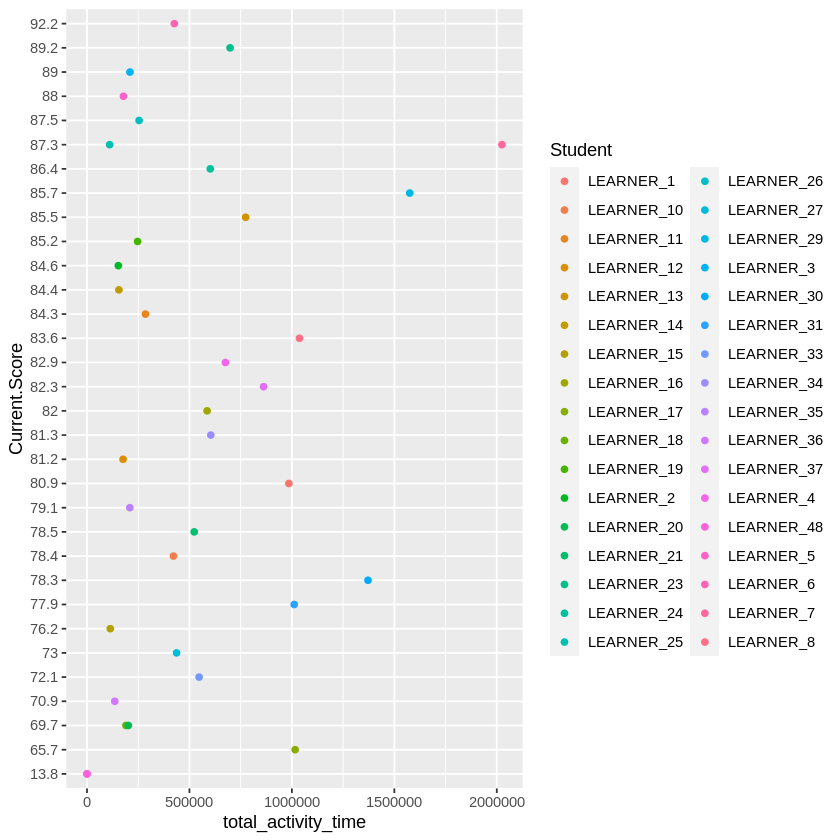

In [35]:
sca_plot_c

In [36]:
sca_plot_a <- useful_data %>%
ggplot()+geom_point(aes(x = total_activity_time, y = av_score, color = Student))

Warning message:
“Removed 2 rows containing missing values (geom_point).”


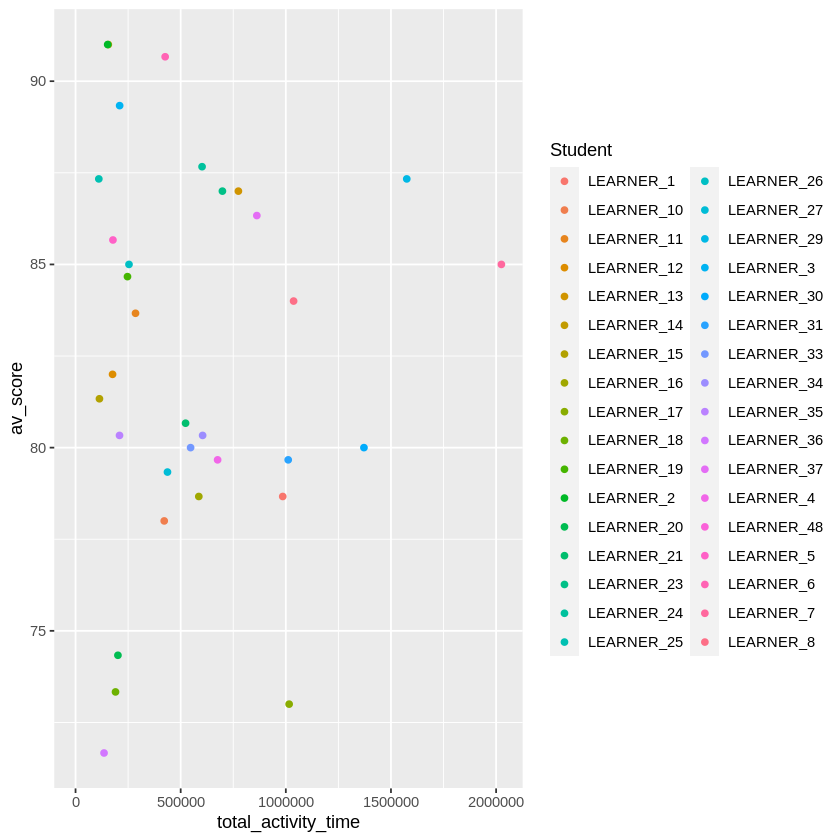

In [37]:
sca_plot_a

In [38]:
dis_data <- read_csv("https://raw.githubusercontent.com/UBC-LA-Hackathon/hack-la-2022/main/data/additional/discussions.csv")

Rows: 1611 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): actor_id, membership_role, post_id, post_parent_id, discussion_top...
dbl  (3): discussion_topic_message_length, post_message_length, count_of_likes
dttm (1): timestamp

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [39]:
head(dis_data)

actor_id   membership_role timestamp          
1 INSTRUCTOR ["Instructor"]  2033-01-18 17:13:01
2 INSTRUCTOR ["Instructor"]  2033-01-18 17:13:02
3 LEARNER_3  ["Learner"]     2033-01-28 06:55:40
4 LEARNER_11 ["Learner"]     2033-01-29 01:04:32
5 LEARNER_3  ["Learner"]     2033-01-29 05:54:31
6 INSTRUCTOR ["Instructor"]  2033-01-29 11:26:11
  post_id                          post_parent_id                  
1 e29fca96e5557a20cabec778dc885345 1e1288fa5e19f13c45b0231e8cbedab6
2 cf6816ae103ab5e2c82d6595eb49e02e 1e1288fa5e19f13c45b0231e8cbedab6
3 abb6c24171f8b195cf0d050858e4ff18 cf6816ae103ab5e2c82d6595eb49e02e
4 a250f9cde1c58d4dba3d4f918e82a018 abb6c24171f8b195cf0d050858e4ff18
5 3ac8537702d3d7d8bf033d73a4491591 a250f9cde1c58d4dba3d4f918e82a018
6 b4ef4eadc997992bfab83b11b50a3771 cf6816ae103ab5e2c82d6595eb49e02e
  discussion_topic_title        discussion_topic_id             
1 Assignment 1 Discussion forum 132f3fab56d60839d727b966a76c1b1e
2 Assignment 1 Discussion forum 132f3fab56d60839d727b966a76c1b1e
3 Assignment 1 Discussion forum 132f3fab56d60839d727b966a76c1b1e
4 Assignment 1 Discussion forum 132f3fab56d60839d727b966a76c1b1e
5 Assignment 1 Discussion forum 132f3fab56d60839d727b966a76c1b1e
6 Assignment 1 Discussion forum 132f3fab56d60839d727b966a76c1b1e
  discussion_topic_message_length post_message_length count_of_likes
1 367                                0                0             
2  79                                0                0             
3  79                              564                0             
4  79                              174                0             
5  79                              226                0             
6  79                             1566                2

In [40]:
dis_data <- dis_data %>%
filter(membership_role == '["Learner"]')

In [41]:
head(dis_data)

actor_id   membership_role timestamp          
1 LEARNER_3  ["Learner"]     2033-01-28 06:55:40
2 LEARNER_11 ["Learner"]     2033-01-29 01:04:32
3 LEARNER_3  ["Learner"]     2033-01-29 05:54:31
4 LEARNER_10 ["Learner"]     2033-01-29 13:25:29
5 LEARNER_37 ["Learner"]     2033-01-29 21:15:25
6 LEARNER_15 ["Learner"]     2033-01-28 09:34:02
  post_id                          post_parent_id                  
1 abb6c24171f8b195cf0d050858e4ff18 cf6816ae103ab5e2c82d6595eb49e02e
2 a250f9cde1c58d4dba3d4f918e82a018 abb6c24171f8b195cf0d050858e4ff18
3 3ac8537702d3d7d8bf033d73a4491591 a250f9cde1c58d4dba3d4f918e82a018
4 8f5bc168b63565c0342a1059130c660e cf6816ae103ab5e2c82d6595eb49e02e
5 f0cb6bb384699139d27bcfa90fd65a4d cf6816ae103ab5e2c82d6595eb49e02e
6 d38fed04d6533ba2814e70bf72470c24 120682cbfb67198365b3508fd8ec2f74
  discussion_topic_title        discussion_topic_id             
1 Assignment 1 Discussion forum 132f3fab56d60839d727b966a76c1b1e
2 Assignment 1 Discussion forum 132f3fab56d60839d727b966a76c1b1e
3 Assignment 1 Discussion forum 132f3fab56d60839d727b966a76c1b1e
4 Assignment 1 Discussion forum 132f3fab56d60839d727b966a76c1b1e
5 Assignment 1 Discussion forum 132f3fab56d60839d727b966a76c1b1e
6 Assignment 1 Discussion forum 132f3fab56d60839d727b966a76c1b1e
  discussion_topic_message_length post_message_length count_of_likes
1 79                               564                0             
2 79                               174                0             
3 79                               226                0             
4 79                               408                0             
5 79                              1409                0             
6 79                               535                0

In [42]:
names(dis_data)[names(dis_data) == 'actor_id'] <- 'Student'

In [43]:
jointdataset_2 <- merge(dis_data, jointdataset, by = "Student")

In [44]:
head(jointdataset_2)

Student   membership_role timestamp          
1 LEARNER_1 ["Learner"]     2033-01-12 11:23:24
2 LEARNER_1 ["Learner"]     2033-01-09 03:32:14
3 LEARNER_1 ["Learner"]     2033-02-06 08:31:21
4 LEARNER_1 ["Learner"]     2033-01-18 09:37:20
5 LEARNER_1 ["Learner"]     2033-01-19 03:59:07
6 LEARNER_1 ["Learner"]     2033-03-20 15:56:51
  post_id                          post_parent_id                  
1 18c743803babf89eb251a62bdb4aaa6c 8a0cfed7b2d26411ea144c4f9515d245
2 1168dcab7b4e53de33323faa83cad99a 6113a4bff5a2382fd4b241441346b88b
3 4950ca412a2ad4b960ea5ee3088041b4 a0fdaaca1aa91e10acc7fd44c34a5cdc
4 1a299c7e838191d574876c5994f907eb 4e645c4729372931a8c43bd0f453bc67
5 4f0413b8588c5ace13e771478ce61424 ebc2fb88d9da05b2840b393af45ac165
6 1145a902834f3fe488ce0c3a6c9ae9fd 57d5d6594f732d759fb560ad95f7ba27
  discussion_topic_title                                             
1 Discussion 1: The meaning of eLearning                             
2 Introduce yourself                                                 
3 Discussion 3: Funding issues                                       
4 Discussion 3: Funding issues                                       
5 Discussion 2: Reflect on rationales for eLearning                  
6 Discussion 9: Aligning institutional plans with government policies
  discussion_topic_id              discussion_topic_message_length
1 c916612763c04832d8e7b9e89deb7d2a 1369                           
2 e1f90c16c123e0f96b2af7d94a1c335c  611                           
3 bb62cd396b9a8a94ecef6b5d1c4f8ad1 1585                           
4 bb62cd396b9a8a94ecef6b5d1c4f8ad1 1585                           
5 7c9e39571ad00fe24282e5b5366d7563  711                           
6 9ef7d7e62a0117e6fca291f4ce0a00c2  462                           
  post_message_length count_of_likes ⋯
1 2935                0              ⋯
2 1377                1              ⋯
3 2315                0              ⋯
4 5437                1              ⋯
5 3559                0              ⋯
6 3614                1              ⋯
  Assignment.3.(option.B).(df8d1f1ff3f48fdc24a278b40c5f45cc)
1 NA                                                        
2 NA                                                        
3 NA                                                        
4 NA                                                        
5 NA                                                        
6 NA                                                        
  Assignment.3.(option.C).(bb971b36c1578cede00150acda89aa99)
1 73                                                        
2 73                                                        
3 73                                                        
4 73                                                        
5 73                                                        
6 73                                                        
  Assignment.3.(option.D).(f1ad954cd2cddda6e17f6fc225d1aa3e)
1 NA                                                        
2 NA                                                        
3 NA                                                        
4 NA                                                        
5 NA                                                        
6 NA                                                        
  Participation.grade:.Formative.(not.included.in.final.grade).(5965e0b0c712861d0efdd9be54572114)
1 9                                                                                              
2 9                                                                                              
3 9                                                                                              
4 9                                                                                              
5 9                                                                                              
6 9                                                                                      

In [56]:
jointdataset_2 <- jointdataset_2 %>%
filter(Student in c("LEARNER_1","LEARNER_2","LEARNER_3")

ERROR: Error in parse(text = x, srcfile = src): <text>:2:16: unexpected 'in'
1: jointdataset_2 <- jointdataset_2 %>%
2: filter(Student in
                  ^


In [52]:
login_plot <- jointdataset_2 %>%
ggplot()+geom_histogram(aes(x = n(Student),color = Student))

In [53]:
time_plot <- jointdataset_2 %>%
ggplot()+geom_histogram(aes(x = timestamp,color = Student))

In [50]:
login_plot

ERROR while rich displaying an object: Error in n(Student): unused argument (Student)

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. paste(capture.output(print(obj)),

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



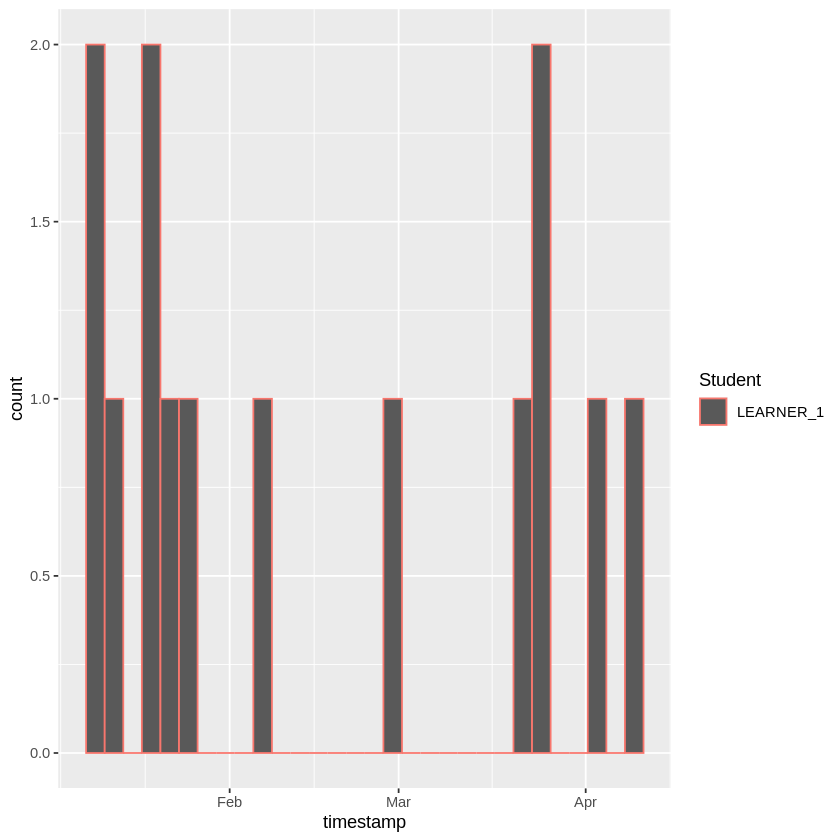

In [54]:
time_plot